<a id="top"></a>

<br>

***
<br>

<center><span style="font-size:40px;">Titanic shipwreck Data Science tutorial in Python</span><center>
 
<br>
***

<br>
<center><span style="font-size:20px;"><span><center>
<br>
<center><span style="font-size:20px;">December 2018<span><center>
<br>

<hr style="background-color: black; padding: 1px;">
<br>
<span style="font-size:24px;">Table of Contents</span>
<br>
<br>
<ol>
    <span style="font-size:20px;"><li><a href="#section1">Introduction</a></li></span>
    <br>
    <br>
    <span style="font-size:20px;"><li><a href="#section2">Taking a look at our data</a></li></span>
    <br>
    <br>
    <span style="font-size:20px;"><li><a href="#section3">Getting our data ready for a prediction model</a></li></span>
    <br>
    <br>
    <span style="font-size:20px;"><li><a href="#section4">Building and testing our model</a></li></span>
</ol>
<br>
<hr style="background-color: black; padding: 1px; margin-top:-5px;">

<a id="section1"></a>

## 1) Introduction

This is a Jupyter Notebook! It displays text like this and makes a convenient platform for writing code in a visual, reproducible manner.

In this notebook we will be looking at data from the Titanic shipwreck that is available for download <a href="https://www.kaggle.com/c/titanic/data">here</a>.

Our goal with this data is to predict whether a given passanger would have survived the shipwreck based on the data provided.

**First we will import some libraries (useful code that other people wrote) that will help us with our analysis**

In [1]:
import pandas as pd # important for viewing and manipulating our data

import seaborn as sns # visualization library to help us make pretty graphs/plots/figures

from sklearn.linear_model import LogisticRegression # we will use this algorithm as the basis for our model

from sklearn.model_selection import train_test_split # this is a helper function to split our data for us

***

<a id="section2"></a>

<div align="right">
    <a href="#top">back to top</a>
</div>

## 2) Taking a look at our data

**Import the data**

In [2]:
df = pd.read_csv("train.csv")

**Look at the first few rows**

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**How many rows and columns are there anyway?**

In [4]:
df.shape # shows us how many (rows,columns) our data has.

(891, 12)

In [5]:
# we can also print messages programmatically

print("So our data has {0} rows and {1} columns!".format(df.shape[0],df.shape[1]))

So our data has 891 rows and 12 columns!


**Are any of our features (columns) missing any values?**

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We see that 177 rows are missing a value for Age.

**Some kind of visualization here just to show it's possible**

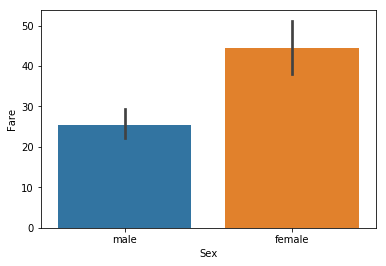

In [7]:
sns.barplot(df['Sex'], df['Fare'])

***

<a id="section3"></a>

<div align="right">
    <a href="#top">back to top</a>
</div>

## 3) Getting our data ready for a prediction model


**Simplify our dataset and separate our prediction labels**

We have quite a few features (again, fancy term for columns) that may be useful in predicting whether a passanger on the Titanic survived the shipwreck, but let's simply things by looking at just a few features that might be especially important:

* Age    - age of passanger
* Fare   - price of ticket
* Sex    - male/female
* Pclass - class categorization 
* Survived - the feature we want to be able to predict

In [8]:
df_subset = df[['Age','Fare','Sex','Pclass', 'Survived']] # these our are training features

**Remove rows with missing values**

Sometimes our data is just missing values. Maybe we don't the price of a passanger's ticket or maybe we don't know their age either way we either need to fill in that data ourselves or just remove the row from our data. We'll do the latter as it's an easy safe approach to cleaning our data.

From above, we already know that our Age feature has missing values so let's take care of that.

In [9]:
df_subset = df_subset.dropna()

**Turning Sex into dummy variables**

If we look back at the few first rows of the data we saw that 'Age', 'Fare' and 'Pclass' are all encoded as numbers, but 'Sex' is encoded with either the word 'male' or the word 'female'. Our prediction models don't understand human words, only numbers so we'll need to convert it somehow. An easy way is to create dummy variables meaning for each category value ('male' and 'female') we create a new column and simply encode 0/no or 1/yes.

In [10]:
# let's review our categories that we need to turn into dummiesa
df_subset['Sex'].unique()

array(['male', 'female'], dtype=object)

In [11]:
# produce two new columns (male and female) with 0's and 1's for no/yes
dummies = pd.get_dummies(df_subset['Sex'])

# join that to the original data
df_subset = df_subset.join(dummies)

# drop our original 'Sex' column
df_subset = df_subset.drop(labels='Sex', axis=1)

In [12]:
# let's take another look at our data to see what we're looking at now
df_subset.head()

,Age,Fare,Pclass,Survived,female,male
0,22.0,7.2500,3,0,0,1
1,38.0,71.2833,1,1,1,0
2,26.0,7.9250,3,1,1,0
3,35.0,53.1000,1,1,1,0
4,35.0,8.0500,3,0,0,1


**Splitting our data into train and test sets**

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df_subset[['female', 'male' ,'Age','Fare']].values , df_subset['Survived'].values, test_size=0.2, random_state=42)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(571, 4)
(143, 4)
(571,)
(143,)


***

<a id="section4"></a>

<div align="right">
    <a href="#top">back to top</a>
</div>

## 4) Building and testing our model

**Building our model**

In [15]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

**Testing our model**

In [17]:
print("Accuracy for our model = {:.2f}%".format((model.score(x_test, y_test))*100))

Accuracy for our model = 74.83%


***

## Congrats on building your very own classification model!